In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\lenovo\Desktop\ML ASS1\bank-marketing.csv")
data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


1 -Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [4]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [6]:
print('median',data.pdays.median())
print('mean:',data.pdays.mean())
print('mode:',data.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


pdays mean is 40.1, median and min is same equals to -1. not only this, the 25% and 75% is also -1.
So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

 Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [8]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [9]:
dataly = data[data.pdays != -1]

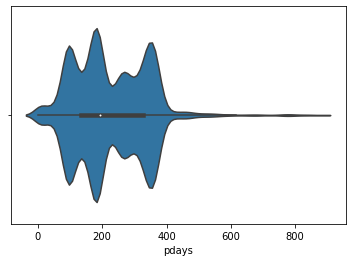

In [10]:
sns.violinplot(dataly.pdays)

In [11]:
print('median',dataly.pdays.median())
print('mean:',dataly.pdays.mean())
print('mode:',dataly.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.



 Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [12]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

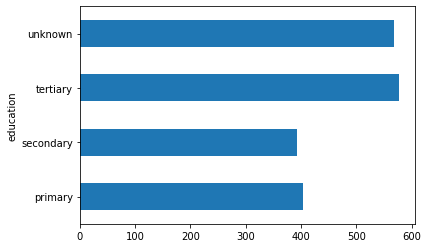

In [13]:
data.groupby(['education'])['balance'].median().plot.barh()

Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

Make a box plot for pdays. Do you see any outliers?

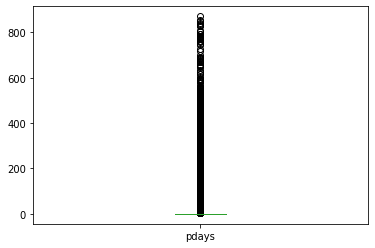

In [15]:
data.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays

# Performing EDA

Converting the response variable to a convenient form

In [16]:
data.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

In [17]:
data.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [18]:
data.response.value_counts()

0    39922
1     5289
Name: response, dtype: int64

# Make suitable plots for associations with numerical features and categorical features’

Visualizing Categorical Features 

In [21]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in data.columns:
    if data[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [22]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


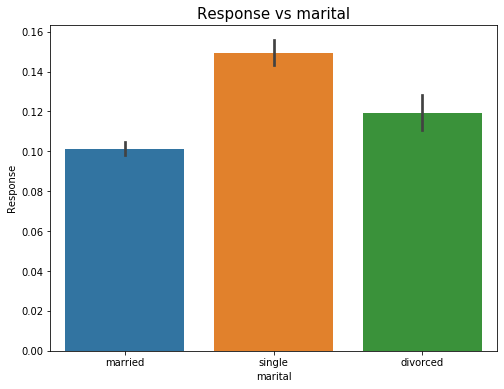

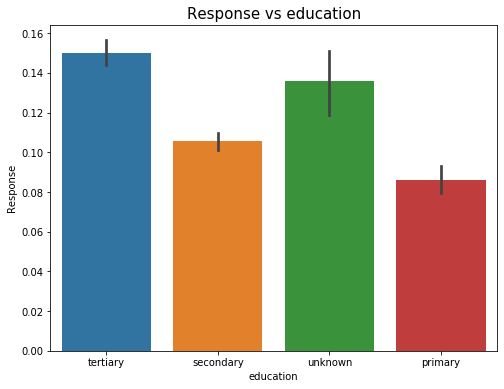

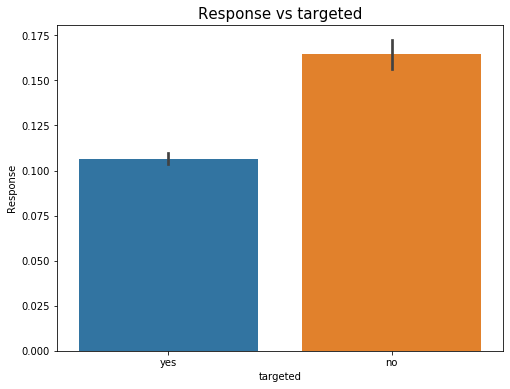

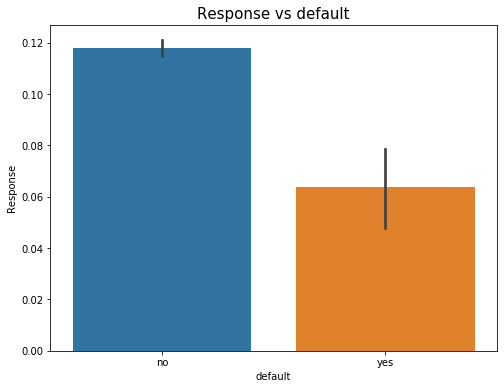

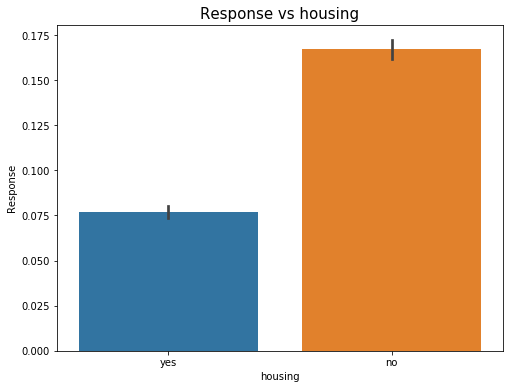

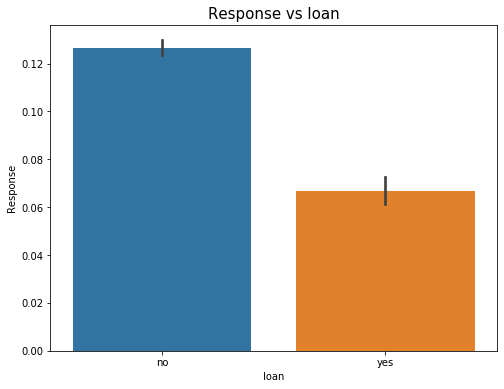

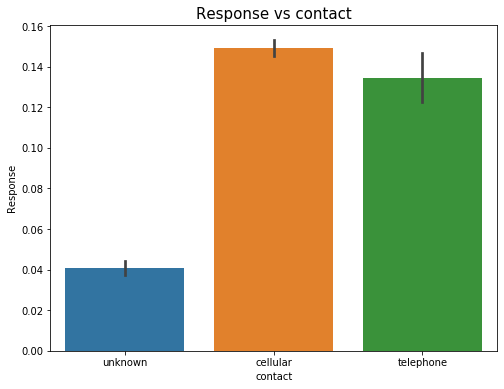

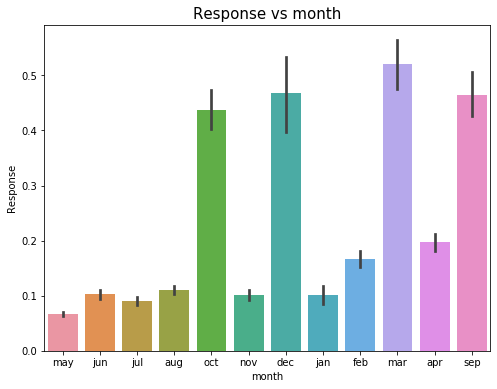

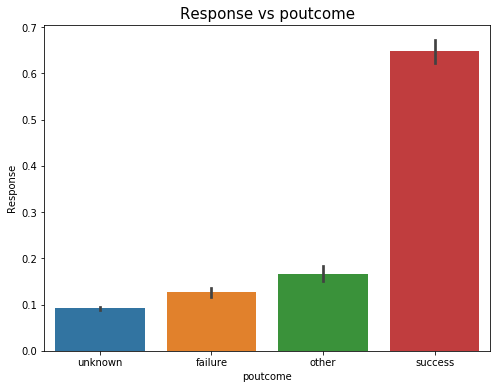

In [25]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.barplot(data[col],data["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

Visualizing Numerical Features

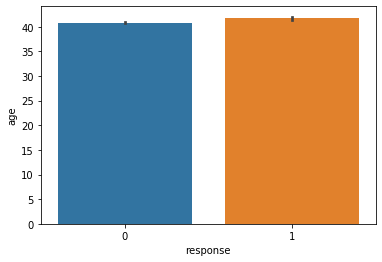

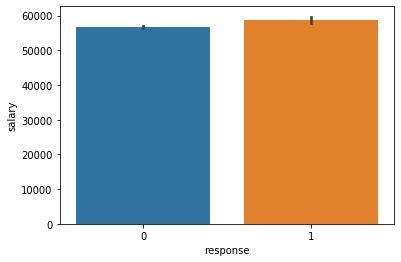

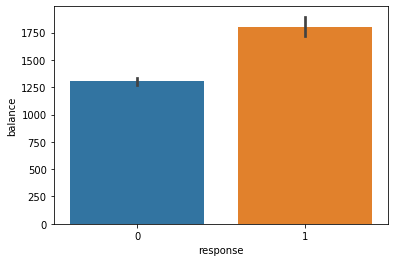

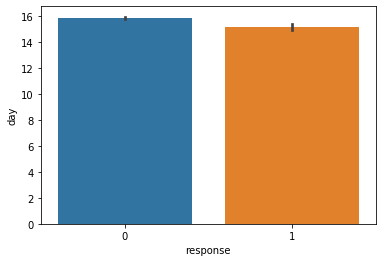

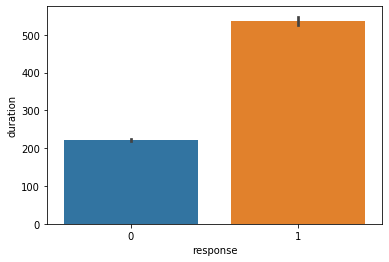

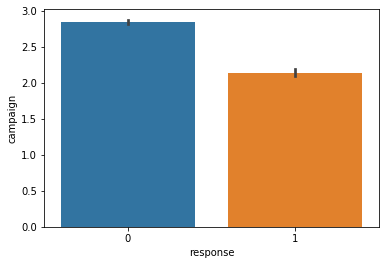

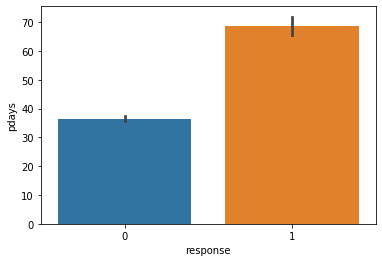

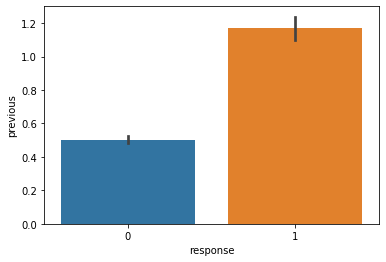

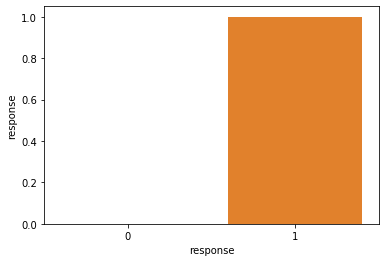

In [29]:
for i in data[num_col]:
    sns.barplot(data.response,data[i])
    plt.show()

# Feature Selection

In [31]:
from sklearn.preprocessing import LabelEncoder

In [34]:
data1 = data[obj_col].apply(LabelEncoder().fit_transform)
data1

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,4,1,2,1,0,1,0,2,8,3
1,9,2,1,1,0,1,0,2,8,3
2,2,1,1,1,0,1,1,2,8,3
3,1,1,3,0,0,1,0,2,8,3
4,11,2,3,0,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3
45207,5,0,0,1,0,0,0,0,9,3
45208,5,1,1,1,0,0,0,0,9,2
45209,1,1,1,1,0,0,0,1,9,3


In [36]:
dataf = data1.join(data[num_col])
dataf

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143,5,261,1,-1,0,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3,51,60000,825,17,977,3,-1,0,1
45207,5,0,0,1,0,0,0,0,9,3,71,55000,1729,17,456,2,-1,0,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,1
45209,1,1,1,1,0,0,0,1,9,3,57,20000,668,17,508,4,-1,0,0


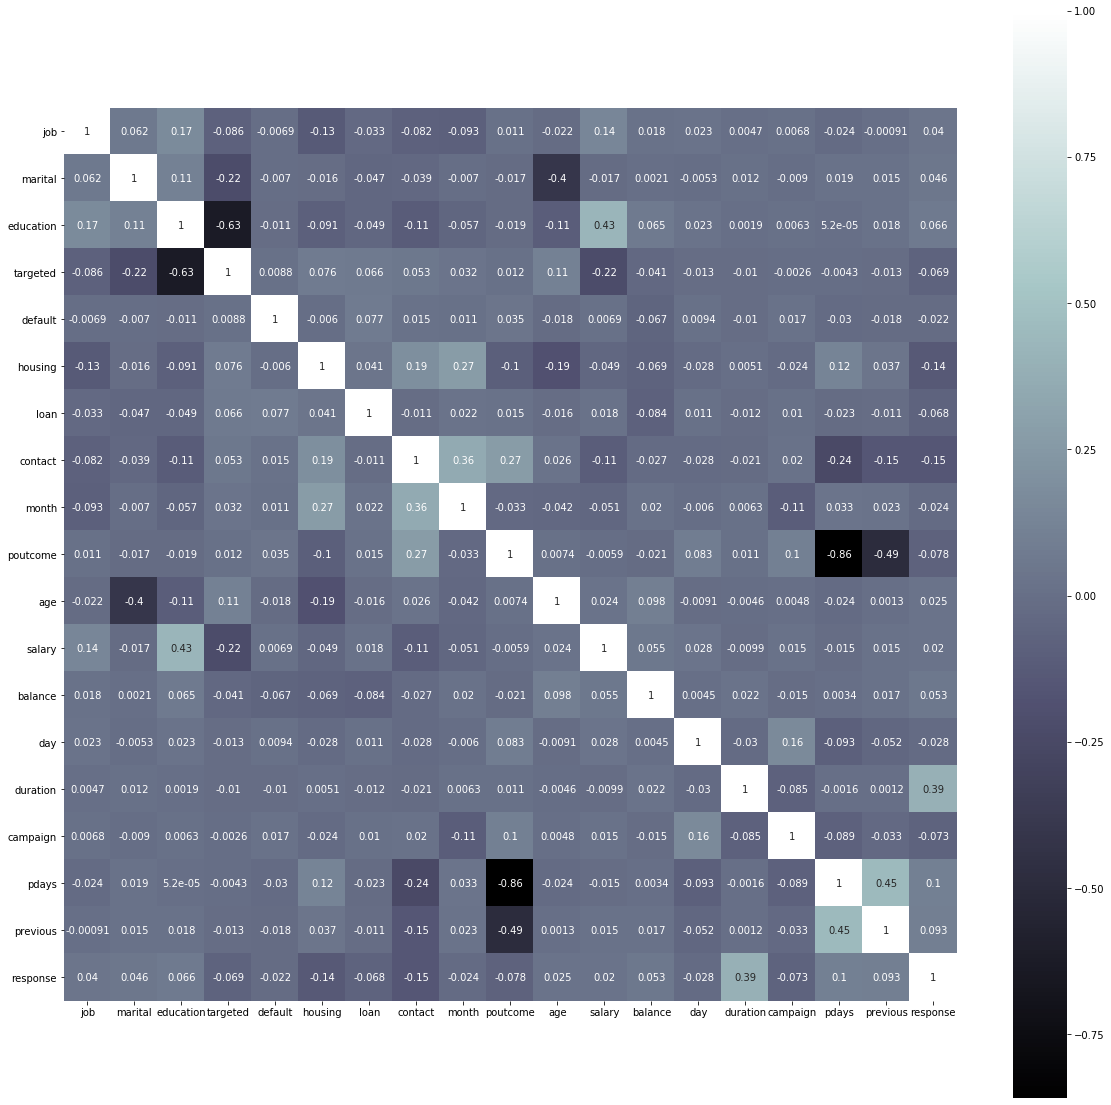

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(dataf.corr(),square=True,annot=True,cmap= 'bone')

Q-Are the features about the previous campaign data useful?

Ans-As we can see the corr value of previous is 0.093 , which is not highly correlated to Response so it is not so muvh useful.

Q-Are pdays and poutcome associated with the target? 

In [39]:
dataf[dataf.pdays == -1]

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143,5,261,1,-1,0,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,8,2,2,0,0,0,0,0,9,3,23,4000,113,17,266,1,-1,0,1
45205,9,2,1,1,0,0,1,0,9,3,25,60000,505,17,386,2,-1,0,1
45206,9,1,2,1,0,0,0,0,9,3,51,60000,825,17,977,3,-1,0,1
45207,5,0,0,1,0,0,0,0,9,3,71,55000,1729,17,456,2,-1,0,1


In [40]:
dataf.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

As we can see more than 70% of Pdays value is -1, so it does not play any important role.

In [41]:
dataf.poutcome.value_counts()

3    36959
0     4901
1     1840
2     1511
Name: poutcome, dtype: int64

As we can see the correlation of poutcome is in negative (-0.078) so its better that we should drop it.

In [43]:
dataf.drop('poutcome',axis=1)

,job,marital,education,targeted,default,housing,loan,contact,month,age,salary,balance,day,duration,campaign,pdays,previous,response
0,4,1,2,1,0,1,0,2,8,58,100000,2143,5,261,1,-1,0,0
1,9,2,1,1,0,1,0,2,8,44,60000,29,5,151,1,-1,0,0
2,2,1,1,1,0,1,1,2,8,33,120000,2,5,76,1,-1,0,0
3,1,1,3,0,0,1,0,2,8,47,20000,1506,5,92,1,-1,0,0
4,11,2,3,0,0,0,0,2,8,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,51,60000,825,17,977,3,-1,0,1
45207,5,0,0,1,0,0,0,0,9,71,55000,1729,17,456,2,-1,0,1
45208,5,1,1,1,0,0,0,0,9,72,55000,5715,17,1127,5,184,3,1
45209,1,1,1,1,0,0,0,1,9,57,20000,668,17,508,4,-1,0,0


# Model Building

# Logistic Regression Mode

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [47]:
X = dataf.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143,5,261,1,-1,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29,5,151,1,-1,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2,5,76,1,-1,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506,5,92,1,-1,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1,5,198,1,-1,0


In [48]:
y= dataf[['response']]
y.head()

,response
0,0
1,0
2,0
3,0
4,0


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [50]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.59      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.24863793957404656
confusion Matrix:
 [[11796  1346]
 [  171   251]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

cross validation: [0.90224483 0.88984738 0.88818845 0.85434638 0.85301924]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
y_pred = lr.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.59      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [54]:
confusion_matrix(y_pred,y_test)

array([[11796,  1346],
       [  171,   251]], dtype=int64)

In [55]:
f1_score(y_pred,y_test)

0.24863793957404656

# RFE

In [56]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=101, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [57]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True])

In [58]:
X_train.columns[rfe.support_]

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'age', 'day', 'duration', 'campaign',
       'previous'],
      dtype='object')

In [60]:
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred2 = lr.predict(X_test[cols])
f1_score(y_pred2,y_test)

0.30987246102975907

In [63]:
confusion_matrix(y_pred2,y_test)

array([[11775,  1269],
       [  192,   328]], dtype=int64)

In [65]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['month', 'age', 'day'], dtype='object')

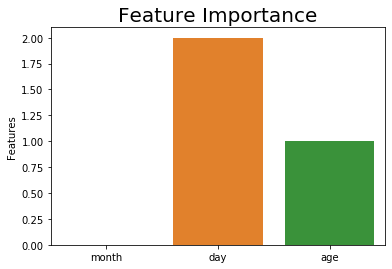

In [66]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

In [112]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print("F1 Score:",f1_score(y_pred2,y_test))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",(y_pred2,y_test))

# VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,poutcome,20.47
10,age,14.05
3,targeted,7.78
2,education,6.27
8,month,5.27
11,salary,5.21
1,marital,4.71
13,day,4.64
16,pdays,3.41
0,job,2.88


# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
X = dataf.drop('response',axis=1)
y = dataf['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [72]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [73]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8913956443633048

In [74]:
y_pred1 = rfc.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11967
           1       0.84      0.10      0.18      1597

    accuracy                           0.89     13564
   macro avg       0.87      0.55      0.56     13564
weighted avg       0.89      0.89      0.85     13564



In [76]:
f1_score(y_test,y_pred1)

0.18495821727019496

In [77]:
confusion_matrix(y_test,y_pred1)

array([[11935,    32],
       [ 1431,   166]], dtype=int64)

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred1)

0.5506354382294998

# RFE

In [81]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='auto',
                                     max_leaf_nodes=50, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=None,
                                     oob_score=False, random_state=101,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [82]:
rfe1.support_

array([False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True, False])

In [83]:
X_train.columns[rfe1.support_]

Index(['month', 'poutcome', 'age', 'duration', 'pdays'], dtype='object')

In [84]:
cols = X_train.columns[rfe1.support_]

In [85]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [87]:
y_pred3 = rfc.predict(X_test[cols])
f1_score(y_pred3,y_test)

0.34282955094157413

In [88]:
confusion_matrix(y_pred3,y_test)

array([[11848,  1242],
       [  119,   355]], dtype=int64)

In [106]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",roc_auc_score(y_pred,y_test))

month, poutcome, age, duration, pdays are important features in Random Forest

In [107]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11967
           1       0.84      0.10      0.18      1597

    accuracy                           0.89     13564
   macro avg       0.87      0.55      0.56     13564
weighted avg       0.89      0.89      0.85     13564

F1 Score: 0.18495821727019496
confusion Matrix:
 [[11935  1431]
 [   32   166]]
cross validation: [0.88300343 0.88332227 0.87027206 0.68104402 0.82614466]
AUC score: 0.5714401988059525
Acurracy :::> 0.7461835034162027


# Comparision

We choose the F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable is imbalanced. So, Precision and Recall can be the main factor for evaluation model and we get the harmonic mean for the same in form of F1 score

In [113]:
print ('start' + "############### Random Forest Result: ###############\n")
RF()
print('start' +'\n\n############# Logistic Regression Result: ############\n')
logReggResult()

start############### Random Forest Result: ###############

Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11967
           1       0.84      0.10      0.18      1597

    accuracy                           0.89     13564
   macro avg       0.87      0.55      0.56     13564
weighted avg       0.89      0.89      0.85     13564

F1 Score: 0.18495821727019496
confusion Matrix:
 [[11935  1431]
 [   32   166]]
cross validation: [0.88300343 0.88332227 0.87027206 0.68104402 0.82614466]
AUC score: 0.5714401988059525
Acurracy :::> 0.7461835034162027
start

############# Logistic Regression Result: ############

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.63      0.21      0.31      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.63     13564
weighted avg       0.87      0.89      0.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

kfold cross validation:
 [0.90224483 0.88984738 0.88818845 0.85434638 0.85301924]
Acurracy :::> (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 37199    0
20751    0
554      0
37464    0
35798    0
        ..
9059     0
20804    0
19560    0
34206    0
14639    0
Name: response, Length: 13564, dtype: int64)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# logistic Regression has Better F1 score, AUC, Confusion Matrix, kfold Cross val and accuracy in compare to Random Forest.

# that means logistic Regression has Perfomed good in comparision to Random Forest..